# CIFAR-10 Image Classification:

The **CIFAR-10** dataset is a well-established benchmark in the field of machine learning, specifically designed for **image classification**. Comprising **60,000 color images**, each of **size 32x32 pixels**, the dataset is segmented into **10 distinct classes**, each representing a different object or creature.

The classes encompass the following:

* Airplane
* Automobile
* Bird
* Cat
* Deer
* Dog
* Frog
* Horse
* Ship
* Truck

Each class contains an equal distribution, boasting 6,000 images. From the total image count, 50,000 are designated for training while the remaining 10,000 are set aside for testing.

### Importing Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import datasets, layers, models
import warnings
warnings.filterwarnings('ignore')

### Loading the Data:

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

### Data Exploration:

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [7]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

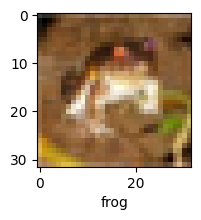

In [8]:
plot_sample(X_train, y_train, 0)

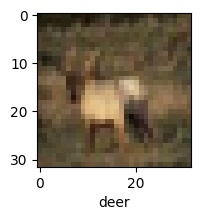

In [9]:
plot_sample(X_train, y_train, 3)

### Normalize the Data (Preprocessing: Scale Images):

In [10]:
X_train = X_train / 255
X_test = X_test / 255

# Artificial Neural Network (ANN):

We first build **Artificial neural network (ANN)** and let's see how it performs.

#### Model Building & Training:

In [11]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3072 - loss: 1.9295
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4223 - loss: 1.6431
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4538 - loss: 1.5512
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4787 - loss: 1.4898
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4946 - loss: 1.4296


I runned only for five epochs but accuracy is pretty low 49% on training samples.

In [12]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4875 - loss: 1.4567


[1.4626251459121704, 0.4814999997615814]

When evaluted on test samples it is 48%. So, **Artificial Neural Network (ANN)** is performing bad on this dataset with five epochs.

In [13]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.44      0.52      1000
           1       0.64      0.59      0.61      1000
           2       0.34      0.43      0.38      1000
           3       0.30      0.53      0.39      1000
           4       0.52      0.23      0.32      1000
           5       0.49      0.24      0.33      1000
           6       0.46      0.64      0.53      1000
           7       0.55      0.56      0.56      1000
           8       0.51      0.73      0.60      1000
           9       0.69      0.41      0.51      1000

    accuracy                           0.48     10000
   macro avg       0.52      0.48      0.48     10000
weighted avg       0.52      0.48      0.48     10000



Now, we are using **Convolutional Neural Network (CNN)** to improve the performance of this model.

# Convolutional Neural Network (CNN):

#### Model Building & Training:

In [15]:
cnn = models.Sequential([
      # cnn
      layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
      layers.MaxPooling2D((2, 2)),

      layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
      layers.MaxPooling2D((2, 2)),

      # dense
      layers.Flatten(),
      layers.Dense(64, activation='relu'),
      layers.Dense(10, activation='softmax')
])

In [16]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [17]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.3683 - loss: 1.7269
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6035 - loss: 1.1389
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6603 - loss: 0.9803
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6919 - loss: 0.8871
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7147 - loss: 0.8176
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7356 - loss: 0.7559
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7582 - loss: 0.6927
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7703 - loss: 0.6611
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7916 - loss: 0.5995
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8025 - loss: 0.5656


So, if you compare with **ANN** see after 5 epochs 71% accuracy in **CNN**. While in **ANN** after 5 epochs I got only 49% accuracy. You can see that using CNN helps you tremendously.

In [19]:
test_loss, test_acc = cnn.evaluate(X_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6930 - loss: 0.9425

Test Accuracy: 0.6920999884605408
Test Loss:     0.9648337960243225


In [22]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [23]:
y_test = y_test.reshape(-1,) # converting into 1D array
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

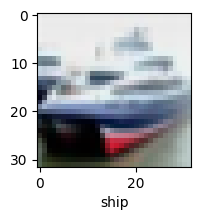

In [24]:
plot_sample(X_test, y_test, 1)

Ok, So my first image is **ship**. Now let's use our model to predict this and see how it performs.

In [25]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[4.83353106e-05, 5.83705787e-06, 2.90872194e-02, 9.17036712e-01,
        5.35244634e-03, 3.26098129e-02, 1.43147195e-02, 7.42962948e-06,
        1.51484739e-03, 2.25806216e-05],
       [3.61202037e-05, 1.08712493e-03, 1.44170713e-06, 1.98252778e-07,
        4.40357723e-10, 1.65051830e-08, 1.86424098e-09, 2.15905498e-08,
        9.98873889e-01, 1.18672142e-06],
       [2.27825865e-02, 1.36477500e-01, 9.83936945e-04, 3.03569855e-03,
        2.18264293e-04, 5.71505981e-04, 1.76864574e-04, 5.11519145e-04,
        8.11944306e-01, 2.32978500e-02],
       [9.74196553e-01, 8.12816579e-05, 1.85008533e-02, 8.56918923e-04,
        1.97368022e-03, 3.74547994e-06, 4.38543539e-05, 3.14729783e-04,
        3.75231751e-03, 2.76014296e-04],
       [4.56539908e-08, 2.13423334e-07, 6.91510364e-02, 1.26838486e-03,
        3.36332858e-01, 1.46081278e-04, 5.93090415e-01, 6.27831298e-07,
        1.02779204e-05, 4.50370656e-08]], dtype=float32)

The values in each of these elements are actually probability distribution between 0 and 1. It is using softmax. <br>
You want to find out which elements is the Max? So for that you can use **argmax() fuction**.

In [29]:
y_pred_classes = [np.argmax(element) for element in y_pred]
y_pred_classes[:5]

[3, 8, 8, 0, 6]

What you get as a result is something you can compare with **y_test**.

In [30]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

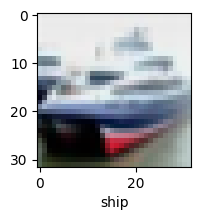

In [31]:
plot_sample(X_test, y_test, 1)

This is **actual value**.

In [32]:
classes[y_pred_classes[1]]

'ship'

This is our **predicted value**.

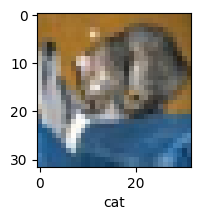

In [33]:
plot_sample(X_test, y_test, 0)

This is **actual value**.

In [34]:
classes[y_pred_classes[0]]

'cat'

This is our **predicted value**.

In [35]:
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.78      0.73      1000
           1       0.85      0.83      0.84      1000
           2       0.53      0.66      0.58      1000
           3       0.49      0.53      0.51      1000
           4       0.62      0.65      0.63      1000
           5       0.69      0.51      0.58      1000
           6       0.69      0.80      0.74      1000
           7       0.79      0.70      0.74      1000
           8       0.87      0.75      0.80      1000
           9       0.83      0.73      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

